# Techigai DS Assignment - Fake News Detection Classifier

## Problem Statement:

It has become extremely easy to propagate any information to the masses, thus making
Fake News a potential threat to public discourse. We would like you to build a model that
when given a news article should determine the relevance of the body and the claim and
classify the article accordingly into four categories: ‘agree’, ‘disagree’, ‘discuss’ and
‘unrelated’. Classes ‘disagree’ and ‘unrelated’ provide strong evidence that the news is fake, ‘agree’
indicates that the news is genuine

In [3]:
#Importing all the required Libraries

In [4]:
import os
import pandas as pd
import numpy as np

#Import Regular Expression
import re

import nltk


In [5]:
#Read the Data
train_data = pd.read_csv("FakeNewsData.csv")

In [6]:
train_data.head()

,Unnamed: 0,Headline,Body,Stance,Headline Word Count,Body Word Count
0,0,Police find mass graves with at least '15 bodi...,Danny Boyle is directing the untitled filmSeth...,unrelated,19,189
1,1,Hundreds of Palestinians flee floods in Gaza a...,Hundreds of Palestinians were evacuated from t...,agree,11,417
2,2,"Christian Bale passes on role of Steve Jobs, a...",30-year-old Moscow resident was hospitalized w...,unrelated,16,189
3,3,HBO and Apple in Talks for $15/Month Apple TV ...,(Reuters) - A Canadian soldier was shot at the...,unrelated,14,78
4,4,Spider burrowed through tourist stomach and up...,"Fear not arachnophobes, the story of Bunbury ""...",disagree,10,588


Data Cleaning -

In [7]:
#Replacing Column name by Position
train_data.rename(columns={ train_data.columns[0]: "id" }, inplace = True)

In [8]:
train_data.head()

,id,Headline,Body,Stance,Headline Word Count,Body Word Count
0,0,Police find mass graves with at least '15 bodi...,Danny Boyle is directing the untitled filmSeth...,unrelated,19,189
1,1,Hundreds of Palestinians flee floods in Gaza a...,Hundreds of Palestinians were evacuated from t...,agree,11,417
2,2,"Christian Bale passes on role of Steve Jobs, a...",30-year-old Moscow resident was hospitalized w...,unrelated,16,189
3,3,HBO and Apple in Talks for $15/Month Apple TV ...,(Reuters) - A Canadian soldier was shot at the...,unrelated,14,78
4,4,Spider burrowed through tourist stomach and up...,"Fear not arachnophobes, the story of Bunbury ""...",disagree,10,588


In [9]:
train_data.shape

(49972, 6)

In [10]:
train_data.dtypes

id                      int64
Headline               object
Body                   object
Stance                 object
Headline Word Count     int64
Body Word Count         int64
dtype: object

In [11]:
train_data.Stance.value_counts()

unrelated    36545
discuss       8909
agree         3678
disagree       840
Name: Stance, dtype: int64

### Feature Engineering

In [9]:
#Fix levels of categorical variable by relevance of the body and the claim

In [12]:
# Check levels of Stance. Is there anything wrong?
print(train_data.Stance.value_counts())



unrelated    36545
discuss       8909
agree         3678
disagree       840
Name: Stance, dtype: int64


In [13]:
# clean up the relevant level 
train_data.replace(['unrelated'], 'disagree', inplace=True)


In [14]:
train_data.replace(['discuss'], 'agree', inplace=True)


In [15]:
train_data.Stance.value_counts()

disagree    37385
agree       12587
Name: Stance, dtype: int64

In [16]:
train_data.head()

,id,Headline,Body,Stance,Headline Word Count,Body Word Count
0,0,Police find mass graves with at least '15 bodi...,Danny Boyle is directing the untitled filmSeth...,disagree,19,189
1,1,Hundreds of Palestinians flee floods in Gaza a...,Hundreds of Palestinians were evacuated from t...,agree,11,417
2,2,"Christian Bale passes on role of Steve Jobs, a...",30-year-old Moscow resident was hospitalized w...,disagree,16,189
3,3,HBO and Apple in Talks for $15/Month Apple TV ...,(Reuters) - A Canadian soldier was shot at the...,disagree,14,78
4,4,Spider burrowed through tourist stomach and up...,"Fear not arachnophobes, the story of Bunbury ""...",disagree,10,588


In [17]:
#Necessary Import
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
train_data.Stance = le.fit_transform(train_data.Stance)

In [20]:
train_data['Stance'] = train_data['Stance'].astype('category')

In [21]:
train_data.head()

,id,Headline,Body,Stance,Headline Word Count,Body Word Count
0,0,Police find mass graves with at least '15 bodi...,Danny Boyle is directing the untitled filmSeth...,1,19,189
1,1,Hundreds of Palestinians flee floods in Gaza a...,Hundreds of Palestinians were evacuated from t...,0,11,417
2,2,"Christian Bale passes on role of Steve Jobs, a...",30-year-old Moscow resident was hospitalized w...,1,16,189
3,3,HBO and Apple in Talks for $15/Month Apple TV ...,(Reuters) - A Canadian soldier was shot at the...,1,14,78
4,4,Spider burrowed through tourist stomach and up...,"Fear not arachnophobes, the story of Bunbury ""...",1,10,588


**Stance :** A Label that marks the news article as potentially unreliable.


1 : disagree - provide strong evidence that the news is fake 


0 : agree - indicates that the news is genuine.

In [23]:
train_data.Stance.value_counts()

1    37385
0    12587
Name: Stance, dtype: int64

In [24]:
#Dropping the Headline and Body Word Count Columns
train_data.drop('Headline Word Count',axis = 1, inplace = True)
train_data.drop('Body Word Count', axis = 1,inplace = True)

Getting Independent Features -

In [25]:
y_data = train_data['Stance']

In [26]:
X_data = train_data.drop('Stance', axis = 1)

In [27]:
X_data.head()

,id,Headline,Body
0,0,Police find mass graves with at least '15 bodi...,Danny Boyle is directing the untitled filmSeth...
1,1,Hundreds of Palestinians flee floods in Gaza a...,Hundreds of Palestinians were evacuated from t...
2,2,"Christian Bale passes on role of Steve Jobs, a...",30-year-old Moscow resident was hospitalized w...
3,3,HBO and Apple in Talks for $15/Month Apple TV ...,(Reuters) - A Canadian soldier was shot at the...
4,4,Spider burrowed through tourist stomach and up...,"Fear not arachnophobes, the story of Bunbury ""..."


In [28]:
y_data.head()

0    1
1    0
2    1
3    1
4    1
Name: Stance, dtype: category
Categories (2, int64): [0, 1]

In [29]:
#Total Number of records
train_data.shape

(49972, 4)

# Text Preprocessing

In [30]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [31]:
train_data.isna().sum()

id          0
Headline    0
Body        0
Stance      0
dtype: int64

In [32]:
train_data = train_data.dropna()

In [33]:
train_data.shape

(49972, 4)

In [34]:
articles = train_data.copy()

In [35]:
articles.head()

,id,Headline,Body,Stance
0,0,Police find mass graves with at least '15 bodi...,Danny Boyle is directing the untitled filmSeth...,1
1,1,Hundreds of Palestinians flee floods in Gaza a...,Hundreds of Palestinians were evacuated from t...,0
2,2,"Christian Bale passes on role of Steve Jobs, a...",30-year-old Moscow resident was hospitalized w...,1
3,3,HBO and Apple in Talks for $15/Month Apple TV ...,(Reuters) - A Canadian soldier was shot at the...,1
4,4,Spider burrowed through tourist stomach and up...,"Fear not arachnophobes, the story of Bunbury ""...",1


In [36]:
articles['Headline'][3]

'HBO and Apple in Talks for $15/Month Apple TV Streaming Service Launching in April'

In [37]:
articles.dtypes

id             int64
Headline      object
Body          object
Stance      category
dtype: object

In [40]:
# Custom Code to Cleaning up all the messages,all the texts with special words,Filtering out the Stop words and Stemming.

In [38]:
#Data Preprocessing and Prep'n
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = [] #Empty corpus
for i in range(0, len(articles)):
    review = re.sub('[^a-zA-Z]', ' ', articles['Headline'][i])
    review = review.lower()
    review = review.split()
# review will be having the list of words
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [39]:
corpus

['polic find mass grave least bodi near mexico town student disappear polic clash',
 'hundr palestinian flee flood gaza israel open dam',
 'christian bale pass role steve job actor reportedli felt right part',
 'hbo appl talk month appl tv stream servic launch april',
 'spider burrow tourist stomach chest',
 'nasa confirm earth experi day total dark decemb fake news stori goe viral',
 'accus boston marathon bomber sever injur prison may never walk talk',
 'ident isi terrorist known jihadi john reportedli reveal',
 'banksi arrest real ident reveal hoax last year',
 'british aid worker confirm murder isi',
 'gateway pundit',
 'woman detain lebanon al baghdadi wife iraq say',
 'kidnap nigerian schoolgirl govern claim ceasefir deal boko haram bring miss girl home',
 'high school kid make million trade stock',
 'soon marijuana may lead ticket arrest new york',
 'vandal add rude paint job bugatti luckili owner turn hoax',
 'boko haram deni nigeria ceas fire claim',
 'robert plant rip million

### Using Count Vectorizer

In [41]:
##Applying Count Vectorizer
#Creating the Bag of Words Model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features =  5000,ngram_range = (1,3))
X = cv.fit_transform(corpus).toarray()

In [42]:
## TFidf Vectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
#X=tfidf_v.fit_transform(corpus).toarray()

In [43]:
X.shape

(49972, 5000)

In [44]:
y = articles['Stance']

### Train Test Split

In [45]:
# Divide the Data into Train-Test-Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.33,random_state = 0)

In [46]:
cv.get_feature_names()[:20]

['abandon',
 'abandon railway',
 'abandon railway station',
 'abandon scottish',
 'abdel',
 'abdel bari',
 'abdel bari key',
 'abdel bari suspect',
 'abdel bari uk',
 'abdel maje',
 'abdel maje abdel',
 'abdi',
 'abdi godan',
 'abduct',
 'abduct american',
 'abduct american journalist',
 'abduct girl',
 'abduct girl marri',
 'abduct islam',
 'abduct islam state']

In [47]:
#Check for the parameters used in CountVectorizer
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [48]:
#Check how the Vectors are formed on your Data
count_df = pd.DataFrame(X_train,columns = cv.get_feature_names())

In [49]:
count_df.head()

,abandon,abandon railway,abandon railway station,abandon scottish,abdel,abdel bari,abdel bari key,abdel bari suspect,abdel bari uk,abdel maje,...,ypg confirm,ypg confirm gill,zack,zack snyder,zehaf,zehaf bibeau,zehaf bibeau ottawa,zeppelin,zeppelin reunion,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#To Visualize the Confusion Matrix
import matplotlib.pyplot as plt

In [51]:
def plot_confusion_matrix(cm , classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    """
    This Function prints and plots Confusion Matrix
    
    """
    plt.imshow(cm, interpolation = 'nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm  =  cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix without Normalization')

    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, cm[i,j]),
        horizontalalignment = "center"
        color = "white" if cm[i,j] > thresh else "black"
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model Building

## Multinomial NB Algorithm

In [53]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [54]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.639
Confusion Matrix without Normalization


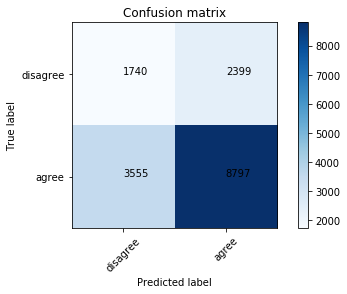

In [55]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['disagree','agree'])

### Validation Metric

In [56]:
f1_score = metrics.f1_score(y_test,pred)
print("f1_score:   %0.3f" % f1_score)

f1_score:   0.747


## Multinomial Classifier with Hyperparameter Tuning

In [57]:
classifier=MultinomialNB(alpha=0.1)

In [58]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\SAI VIVEK.K\anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.6359226244618277
Alpha: 0.1, Score : 0.6365290158268146
Alpha: 0.2, Score : 0.6365290158268146
Alpha: 0.30000000000000004, Score : 0.6368322115093081
Alpha: 0.4, Score : 0.6379237159662846
Alpha: 0.5, Score : 0.6382269116487781
Alpha: 0.6000000000000001, Score : 0.6382269116487781
Alpha: 0.7000000000000001, Score : 0.6382875507852768
Alpha: 0.8, Score : 0.6385301073312716
Alpha: 0.9, Score : 0.6387120247407677


In [59]:
## Get Features names
feature_names = cv.get_feature_names()

In [60]:
classifier.coef_[0]

array([-7.86636433, -9.33948568, -9.33948568, ..., -8.45740171,
       -9.4990591 , -9.01488302])

In [61]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.618067564198537, 'isi'),
 (-5.235891992634215, 'report'),
 (-5.358564207695026, 'say'),
 (-5.387051388722257, 'claim'),
 (-5.412879270678331, 'behead'),
 (-5.489589165960185, 'foley'),
 (-5.566555229395321, 'video'),
 (-5.574041313083411, 'jame'),
 (-5.598940586824527, 'journalist'),
 (-5.611626640389462, 'michael'),
 (-5.648469871334325, 'man'),
 (-5.676075324675423, 'state'),
 (-5.691320684357426, 'appl'),
 (-5.705243099663739, 'islam'),
 (-5.780436096486826, 'kill'),
 (-5.793111608431407, 'american'),
 (-5.817211234189326, 'haram'),
 (-5.817211234189326, 'boko haram'),
 (-5.817211234189326, 'boko'),
 (-5.825960961897814, 'brown')]

In [62]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.161539486309364, 'pee snow'),
 (-10.09658159003459, 'et'),
 (-10.09658159003459, 'et open'),
 (-10.09658159003459, 'et open new'),
 (-10.09658159003459, 'jong un et'),
 (-10.09658159003459, 'un et'),
 (-10.09658159003459, 'un et open'),
 (-10.03558707733175, 'jj'),
 (-10.03558707733175, 'jj abram'),
 (-10.03558707733175, 'move'),
 (-9.978099986414069, 'batman superman batmobil'),
 (-9.978099986414069, 'batmobil reportedli'),
 (-9.978099986414069, 'batmobil reportedli stolen'),
 (-9.978099986414069, 'reportedli stolen'),
 (-9.978099986414069, 'reportedli stolen shocker'),
 (-9.978099986414069, 'shocker'),
 (-9.978099986414069, 'shocker detroit'),
 (-9.978099986414069, 'shocker detroit local'),
 (-9.978099986414069, 'stolen shocker'),
 (-9.978099986414069, 'stolen shocker detroit'),
 (-9.978099986414069, 'superman batmobil reportedli'),
 (-9.978099986414069, 'updat batman'),
 (-9.978099986414069, 'updat batman superman'),
 (-9.92373877719518, 'dozen'),
 (-9.92373877719518, 'ebola o